In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image

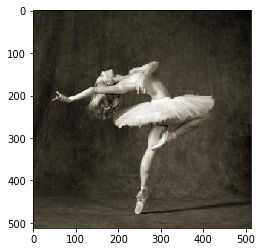

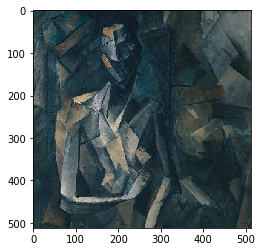

In [14]:
p = Image.open('dancing.jpg').resize((512,512))
#a = Image.open('picasso.jpg').convert('LA').convert('RGB')
a = Image.open('picasso.jpg')
a = a.resize(p.size)

plt.imshow(p)
plt.show()

plt.imshow(a)
plt.show()

In [23]:
import style

In [24]:
st = style.IteratedStyleTransfer()

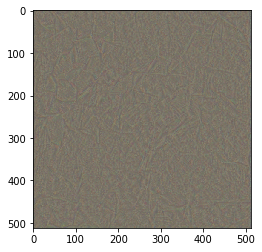

  7%|███▎                                         | 89/1200 [00:11<02:16,  8.14it/s, loss=[0.001 0.    0.001], lr=0.01]


KeyboardInterrupt: 

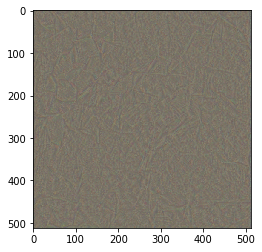

In [25]:
# interactive 

c_id = st.conv_ids[4]
s_ids = st.conv_ids[[4,8,12]]

g = st.iterate(style.normalize(p), style.normalize(a), c_id, s_ids, niter=1200, lr=1e-2, wc=1e-3, ws=1e4);

fig, ax = plt.subplots()
img = ax.imshow(np.zeros((p.height, p.width, 3), dtype=np.uint8))

for x in g:    
    clear_output(wait=True)
    img.set_data(style.denormalize(x.detach().squeeze().cpu()))
    display(fig)

## Hierarchy

100%|█████████████████████████████████████████████| 300/300 [00:02<00:00, 118.44it/s, loss=[0.069 0.023 0.092], lr=0.1]


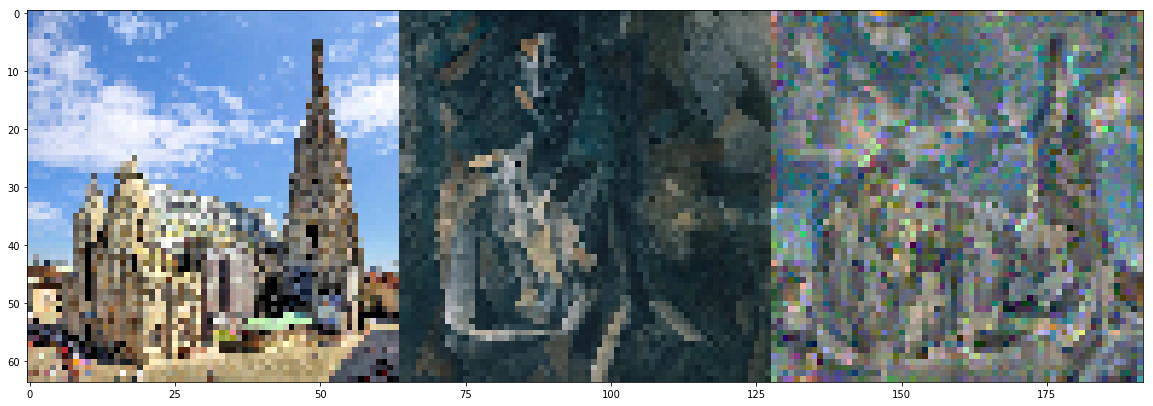

100%|██████████████████████████████████████████████| 300/300 [00:03<00:00, 89.58it/s, loss=[0.047 0.013 0.059], lr=0.1]


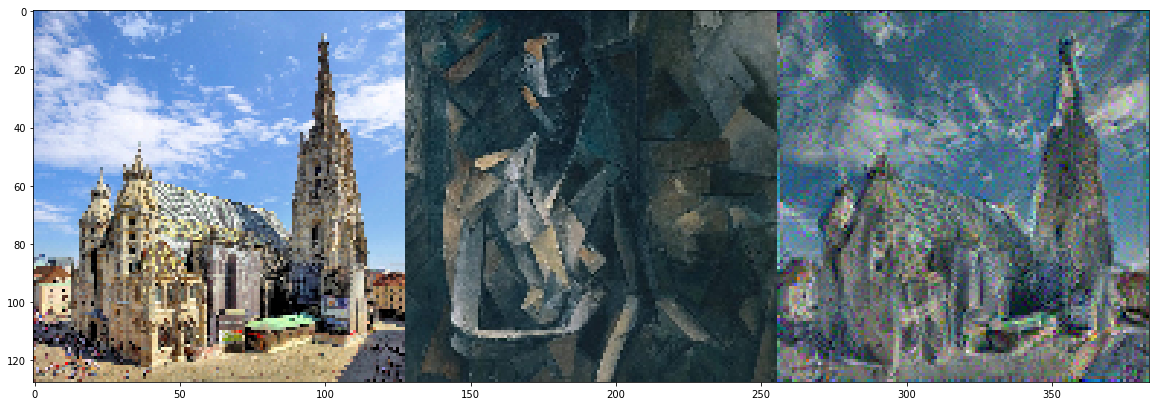

100%|██████████████████████████████████████████████| 300/300 [00:07<00:00, 41.08it/s, loss=[0.037 0.009 0.046], lr=0.1]


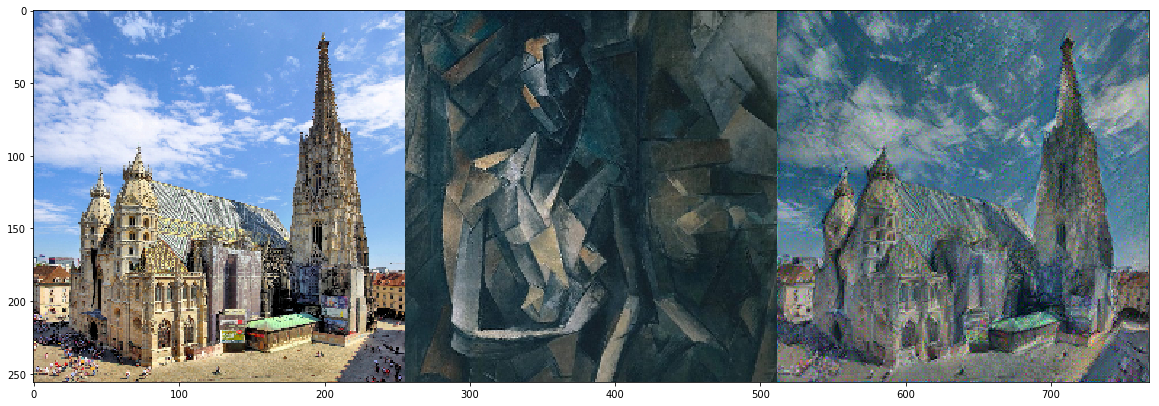

100%|██████████████████████████████████████████████| 300/300 [00:22<00:00, 13.14it/s, loss=[0.032 0.008 0.04 ], lr=0.1]


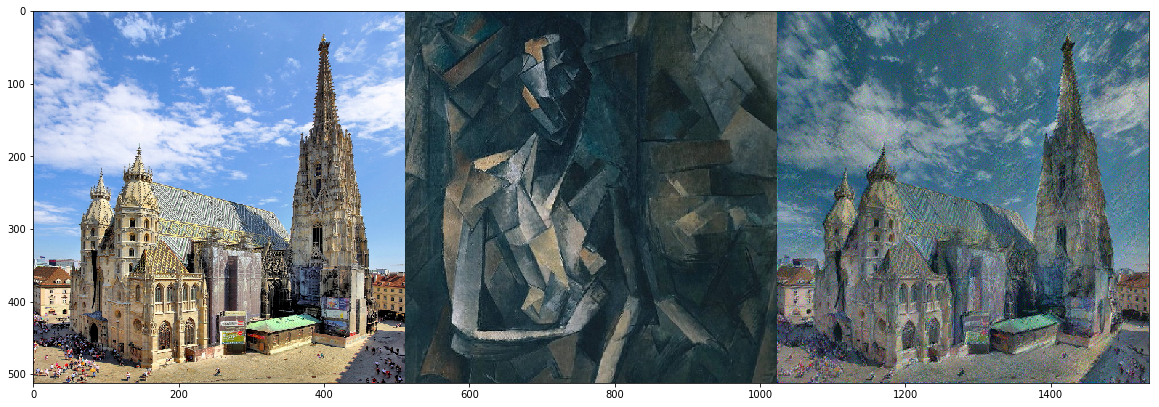

In [37]:
p = Image.open('stephansdom_small.png').resize((512,512))
a = Image.open('picasso.jpg')

scales = [64, 128, 256, 512]
c_id = st.conv_ids[6]
s_ids = st.conv_ids[[2,4,6]]
x = None
for s in scales:
    pscaled = p.resize((s, s))
    ascaled = a.resize(pscaled.size)
    
    if x is not None:
        x = Image.fromarray(x).resize((s, s))
        x = style.normalize(x)
    
    x = st.run(style.normalize(pscaled), style.normalize(ascaled), c_id, s_ids, niter=300, lr=1e-1, wc=1e-2, ws=1e4, x=x)
    x = style.denormalize(x.detach().squeeze().cpu())
    
    plt.figure(figsize=(20,8))
    plt.imshow(np.hstack((pscaled, ascaled, x)))
    plt.show()
    
    

## Parameter Evaluation

In [ ]:
from itertools import product

content_choices = [2, 4, 8, 12]
style_choices = [[1,2,4], [4,6,8], [8,10,12]]

images = []
for c,s in product(content_choices, style_choices):
    x = run_style_transfer(vgg, dev, tnorm(p), tnorm(a), layer_ids[c], layer_ids[s], niter=2000, lr=1e-2, wc=1e-3, ws=1e4);
    images.append(tdenorm(x.squeeze().cpu()))

In [ ]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

In [ ]:
gall = gallery(np.array(images), ncols=3)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(gall)